### Imports

In [48]:
import os
import datetime
from time import strftime
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
#Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier

In [3]:
#Deep Learning
import tensorflow as tf
import tensorboard as TensorBoard
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

### Constants

In [4]:
PATH = "heart.csv"

dirname = ""
samples_per_batch = 200
nr_epochs = 150

Reading CSV file

In [5]:
df = pd.read_csv(PATH)

In [6]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Checking for Data Description

POINTS TO NOTICE -
* Checking for max and min values
* Checking if the number of rows for each column is the same
* Checking for mean(Average)

In [7]:
df.describe() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### Checking for Null values and data Type

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


* No Null values found so we can proceed <br>
* Data types tells us its all numeric so we can proceed

### Columns    
    1. age
    2. sex
    3. chest pain type (4 values)
    4. resting blood pressure
    5. serum cholestoral in mg/dl
    6. fasting blood sugar > 120 mg/dl
    7. resting electrocardiographic results (values 0,1,2)
    8. maximum heart rate achieved
    9. exercise induced angina
    10.oldpeak = ST depression induced by exercise relative to rest
    11.the slope of the peak exercise ST segment
    12.number of major vessels (0-3) colored by flourosopy
    13.thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


<center><h2>Plotting Function</h2></center>

In [10]:
def row_fun(label, colour, feature):
    #age VS heart Disease
    #min - 29
    #max - 77

    X = df[feature]
    Y = df['target']
    
    age = list() #Unique age(X-AXIS)
    noOfDisease =  list() #Number of heart disase at the age(Y-AXIS)
    
    for i in range(0, len(X)):
        if(df['target'][i] == 1):
            if(df[feature][i] not in age):
                age.append(df[feature][i])
                noOfDisease.append(1)
            else:
                index = age.index(df[feature][i])
                noOfDisease[index] = noOfDisease[index] + 1

    
    print(label," <-> Number of corresponding diseases")
    print(age," <-> ", noOfDisease)
    
    plt.figure(figsize=(20,9))
    plt.xticks(age)
    plt.yticks(noOfDisease)
    plt.title("No of Disease VS "+label)
    plt.xlabel(label)
    plt.ylabel("Number of Disease")
    plt.scatter(age, noOfDisease, color=colour)
    
    for i in range(len(age)):
        plt.annotate((noOfDisease[i],age[i]), (age[i], noOfDisease[i]+0.3))
    
    plt.show()
    

In [11]:
def col_fun(label, colour, feature):
    #age VS heart Disease
    #min - 29
    #max - 77

    X = df[feature]
    Y = df['target']
    
    age = list() #Unique age(X-AXIS)
    noOfDisease =  list() #Number of heart disase at the age(Y-AXIS)
    
    for i in range(0, len(X)):
        if(df['target'][i] == 1):
            if(df[feature][i] not in age):
                age.append(df[feature][i])
                noOfDisease.append(1)
            else:
                index = age.index(df[feature][i])
                noOfDisease[index] = noOfDisease[index] + 1

    
    print(label," <-> Number of corresponding diseases")
    print(age," <-> ", noOfDisease)
    
    plt.figure(figsize=(20,9))
    #plt.xticks(age)
    plt.title("No of Disease VS "+label)
    plt.xlabel("Number of Heart Diseases")
    plt.ylabel("serum_cholestoral_in_mg")
    plt.scatter(noOfDisease, age, color=colour)
    
    #for i in range(len(age)):
        #plt.annotate((noOfDisease[i],age[i]), (age[i]-0.3, noOfDisease[i]+0.3))
    
    plt.show()

<Center><h2>Age Analysis</h2></center>

Age  <-> Number of corresponding diseases
[63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 58, 50, 66, 43, 69, 59, 42, 61, 40, 71, 51, 65, 53, 46, 45, 39, 47, 62, 34, 35, 29, 55, 60, 67, 68, 74, 76, 70, 38]  <->  [3, 2, 9, 5, 7, 8, 9, 10, 4, 3, 6, 7, 4, 4, 5, 2, 5, 7, 1, 1, 3, 9, 4, 6, 4, 6, 3, 3, 4, 2, 2, 1, 3, 3, 3, 2, 1, 1, 1, 2]


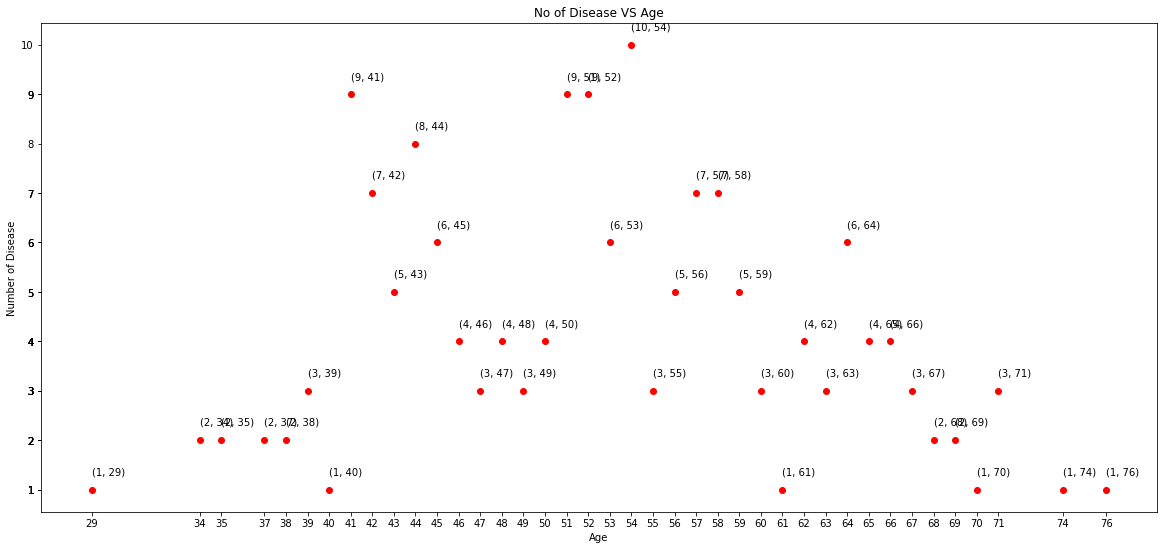

In [12]:
row_fun("Age", "red", "age")

<i>Observation for Age
   * Maximum number of heart Disease Problem is during the age of 46-71 
    <br>
   * The highest was observed at 54</i>

<Center><h2>Chest Compressions</h2></center>

ChestCompressions  <-> Number of corresponding diseases
[3, 2, 1, 0]  <->  [16, 69, 41, 39]


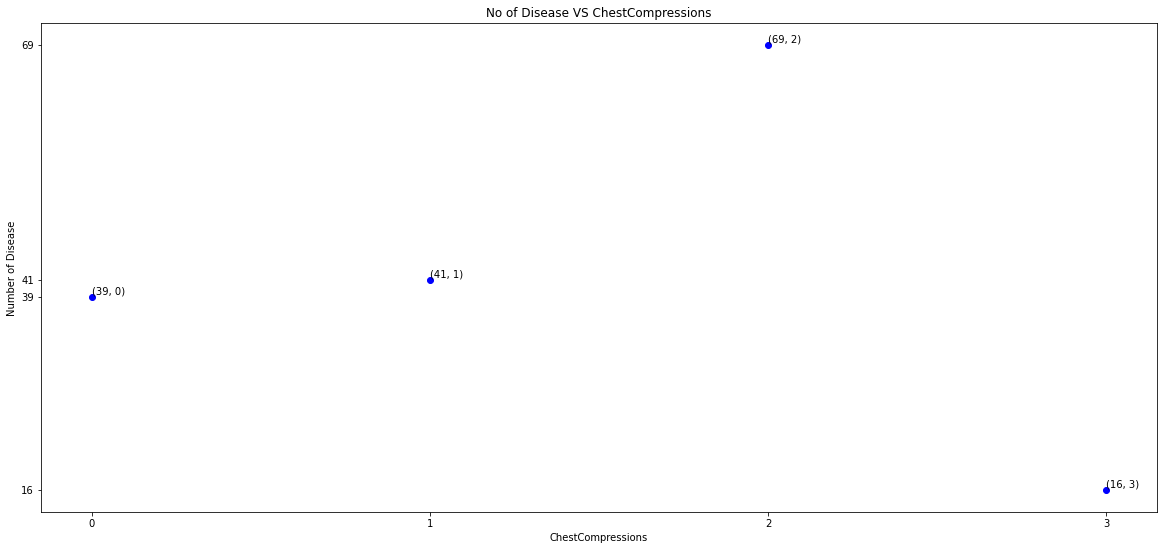

In [13]:
#Chest compression value ranges from 0-3
row_fun("ChestCompressions", "blue", "cp")

<i>Observation for Age
    <br>
    1) Compression rate 3 is rarely observed and has the least number of heart Diseases
    <br>
    2) Compression rate 2 has the highest number of heart Diseases
    <br>
    3) Compression rate 0 and 1 has almost similar number cases of heart Diseases
</i>

<Center><h2>Resting_Blood_Pressure</h2></center>

In [14]:
df['trestbps'].describe()

count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

Resting_Blood_Pressure  <-> Number of corresponding diseases
[145, 130, 120, 140, 172, 150, 110, 135, 160, 105, 125, 142, 155, 104, 138, 128, 108, 134, 122, 115, 118, 100, 124, 94, 112, 102, 152, 101, 132, 148, 178, 129, 180, 136, 126, 106, 156, 170, 146]  <->  [1, 23, 23, 17, 1, 9, 8, 5, 5, 3, 4, 2, 1, 1, 10, 6, 4, 2, 3, 3, 5, 2, 2, 2, 5, 2, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


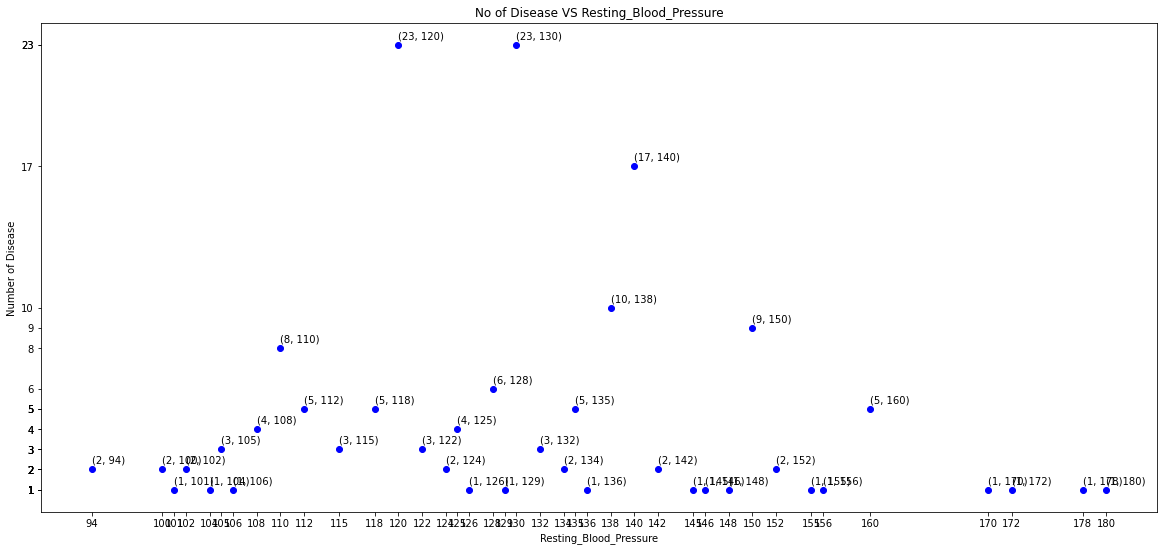

In [15]:
row_fun("Resting_Blood_Pressure", "blue", "trestbps")

<Center><h2>Cholestrol</h2></center>

In [16]:
df['chol'].describe()

count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64

serum_cholestoral_in_mg/dl  <-> Number of corresponding diseases
[233, 250, 204, 236, 354, 192, 294, 263, 199, 168, 239, 275, 266, 211, 283, 219, 340, 226, 247, 234, 243, 302, 212, 175, 417, 197, 198, 177, 273, 213, 304, 232, 269, 360, 308, 245, 208, 264, 321, 325, 235, 257, 216, 256, 231, 141, 252, 201, 222, 260, 182, 303, 265, 309, 186, 203, 183, 220, 209, 258, 227, 261, 221, 205, 240, 318, 298, 564, 277, 214, 248, 255, 207, 223, 288, 160, 394, 315, 246, 244, 270, 195, 196, 254, 126, 313, 262, 215, 193, 271, 268, 267, 210, 295, 306, 178, 242, 180, 228, 149, 278, 253, 342, 157]  <->  [3, 3, 4, 2, 1, 2, 1, 2, 3, 1, 2, 1, 1, 4, 1, 2, 1, 4, 1, 4, 2, 2, 1, 3, 1, 4, 1, 2, 1, 2, 1, 1, 3, 1, 2, 3, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 3, 2, 1, 1, 1, 1, 3, 2, 1, 2, 1, 2, 1, 4, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


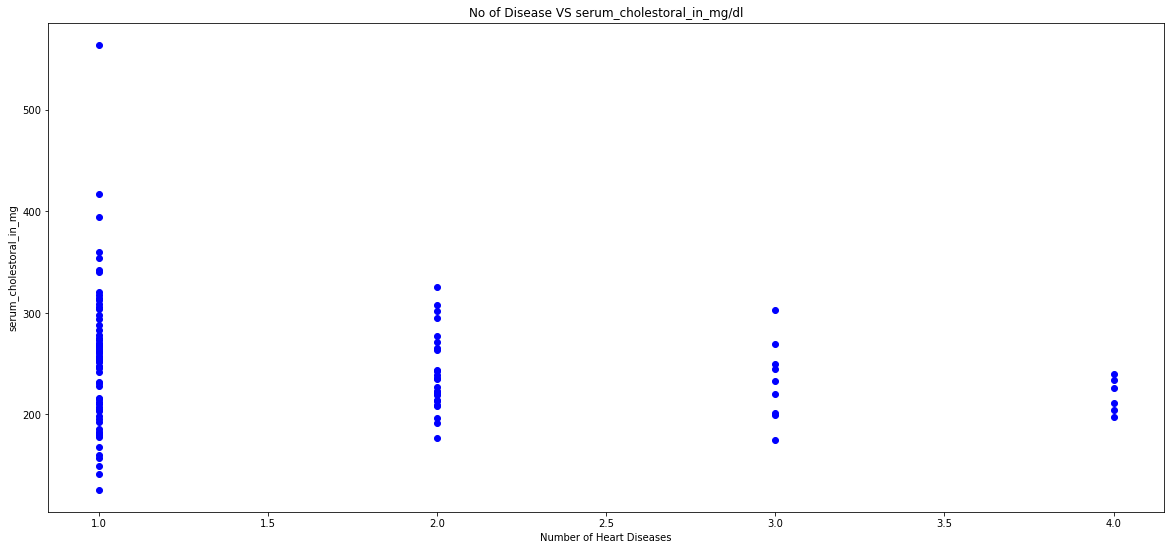

In [17]:
col_fun("serum_cholestoral_in_mg/dl", "blue", "chol")

<i>Observation for Age
    <br>
    1) Less than 200mg/dl is considered healthy. Very few cases are observed less than 200mg/dl
</i>

In [18]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<center><h2> fasting blood sugar 

In [19]:
df['fbs']

0      1
1      0
2      0
3      0
4      0
      ..
298    0
299    0
300    1
301    0
302    0
Name: fbs, Length: 303, dtype: int64

<center>
Fasting blood sugar > 120 mg/dl
<br>
 * Greated than 120 mg/dl = 1 
<br>
 * Less than 120 mg/dl = 0

 fasting blood sugar   <-> Number of corresponding diseases
[1, 0]  <->  [23, 142]


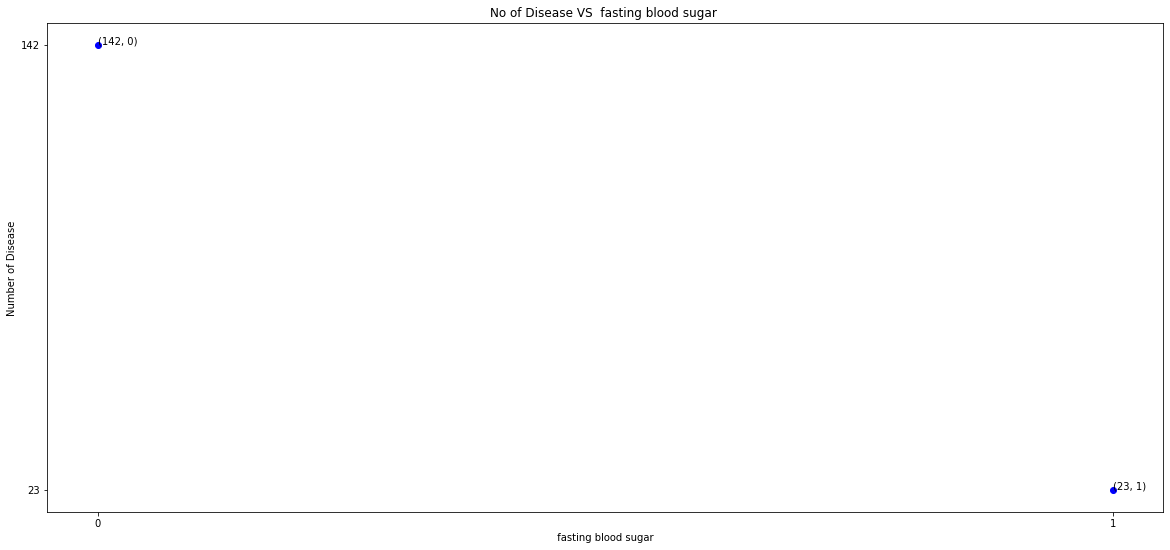

In [20]:
row_fun(" fasting blood sugar ", "blue", "fbs")

<center> <h1>Feature Selection 

<img src="Capture.png">

<center><h3>Pearson Co-relation

In [21]:
corr = df.corr()

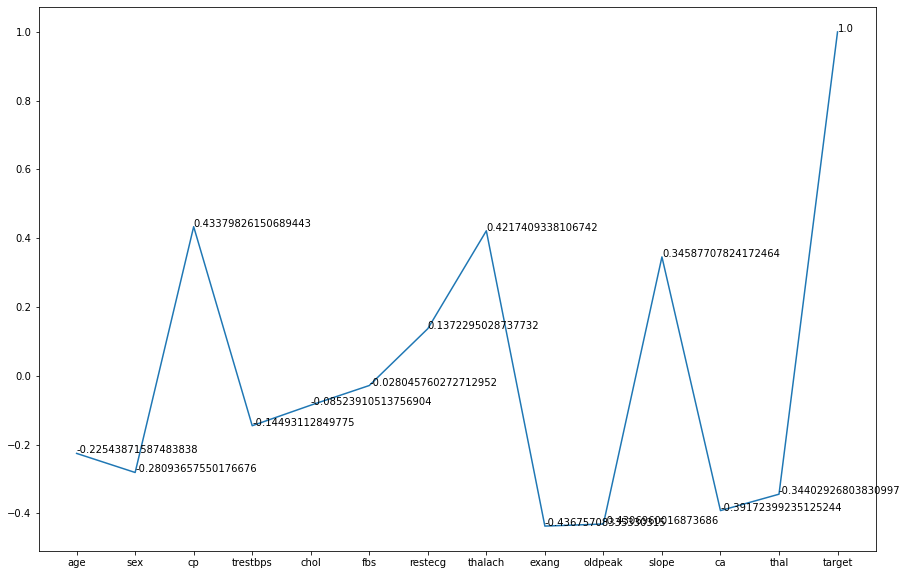

In [22]:
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
plt.figure(figsize=(15,10))
plt.plot(corr['target'])
for i in range(len(corr.columns)):
    plt.annotate((corr['target'][i]), (columns[i], corr['target'][i]))
plt.show()

In [23]:
corr.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,0.084957,0.056768,0.068181,0.112009,0.079669,0.100592,0.041539,0.043432,0.033654,0.051411,0.038592,0.089755,0.089780,-0.002082
std,0.332574,0.301793,0.338298,0.285763,0.286834,0.270041,0.288345,0.379301,0.364129,0.381970,0.365488,0.321196,0.307032,0.421655
min,-0.398522,-0.280937,-0.394280,-0.144931,-0.197912,-0.084189,-0.151040,-0.398522,-0.436757,-0.577537,-0.577537,-0.391724,-0.344029,-0.436757
25%,-0.111770,-0.057839,-0.131149,-0.054251,-0.060163,-0.023176,-0.081152,-0.183992,-0.210994,-0.126615,-0.117297,-0.078127,-0.080334,-0.328256
50%,0.082401,-0.037365,-0.002466,0.064913,0.033623,0.019479,-0.058483,-0.026980,0.067319,0.075022,-0.045302,0.108564,0.065106,-0.115085
75%,0.212762,0.112719,0.113398,0.163941,0.091730,0.114592,0.044346,0.232852,0.135183,0.210186,0.113049,0.148369,0.193023,0.293715
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

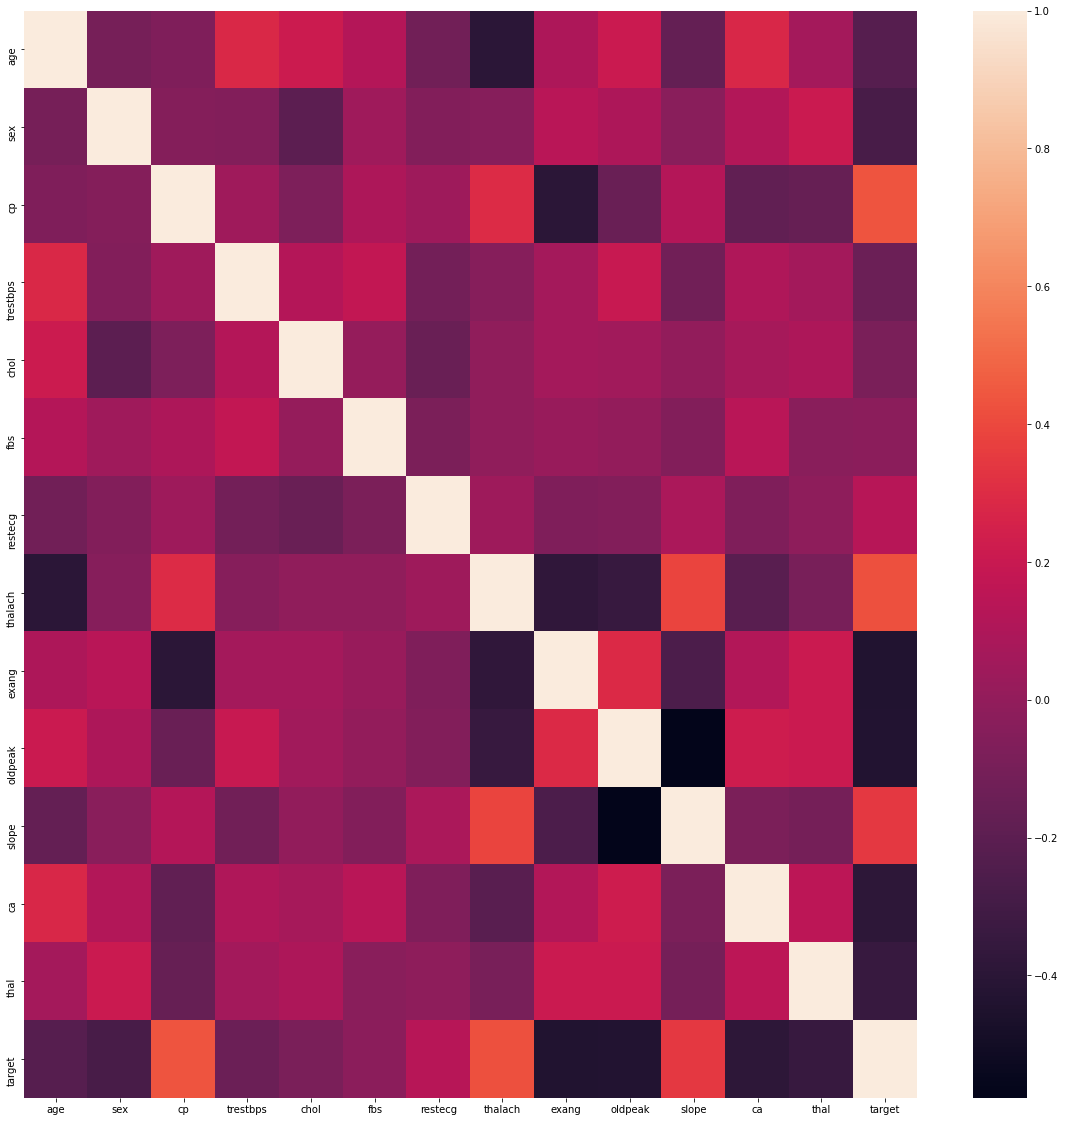

In [24]:
plt.figure(figsize=(20,20))
sns.heatmap(corr)

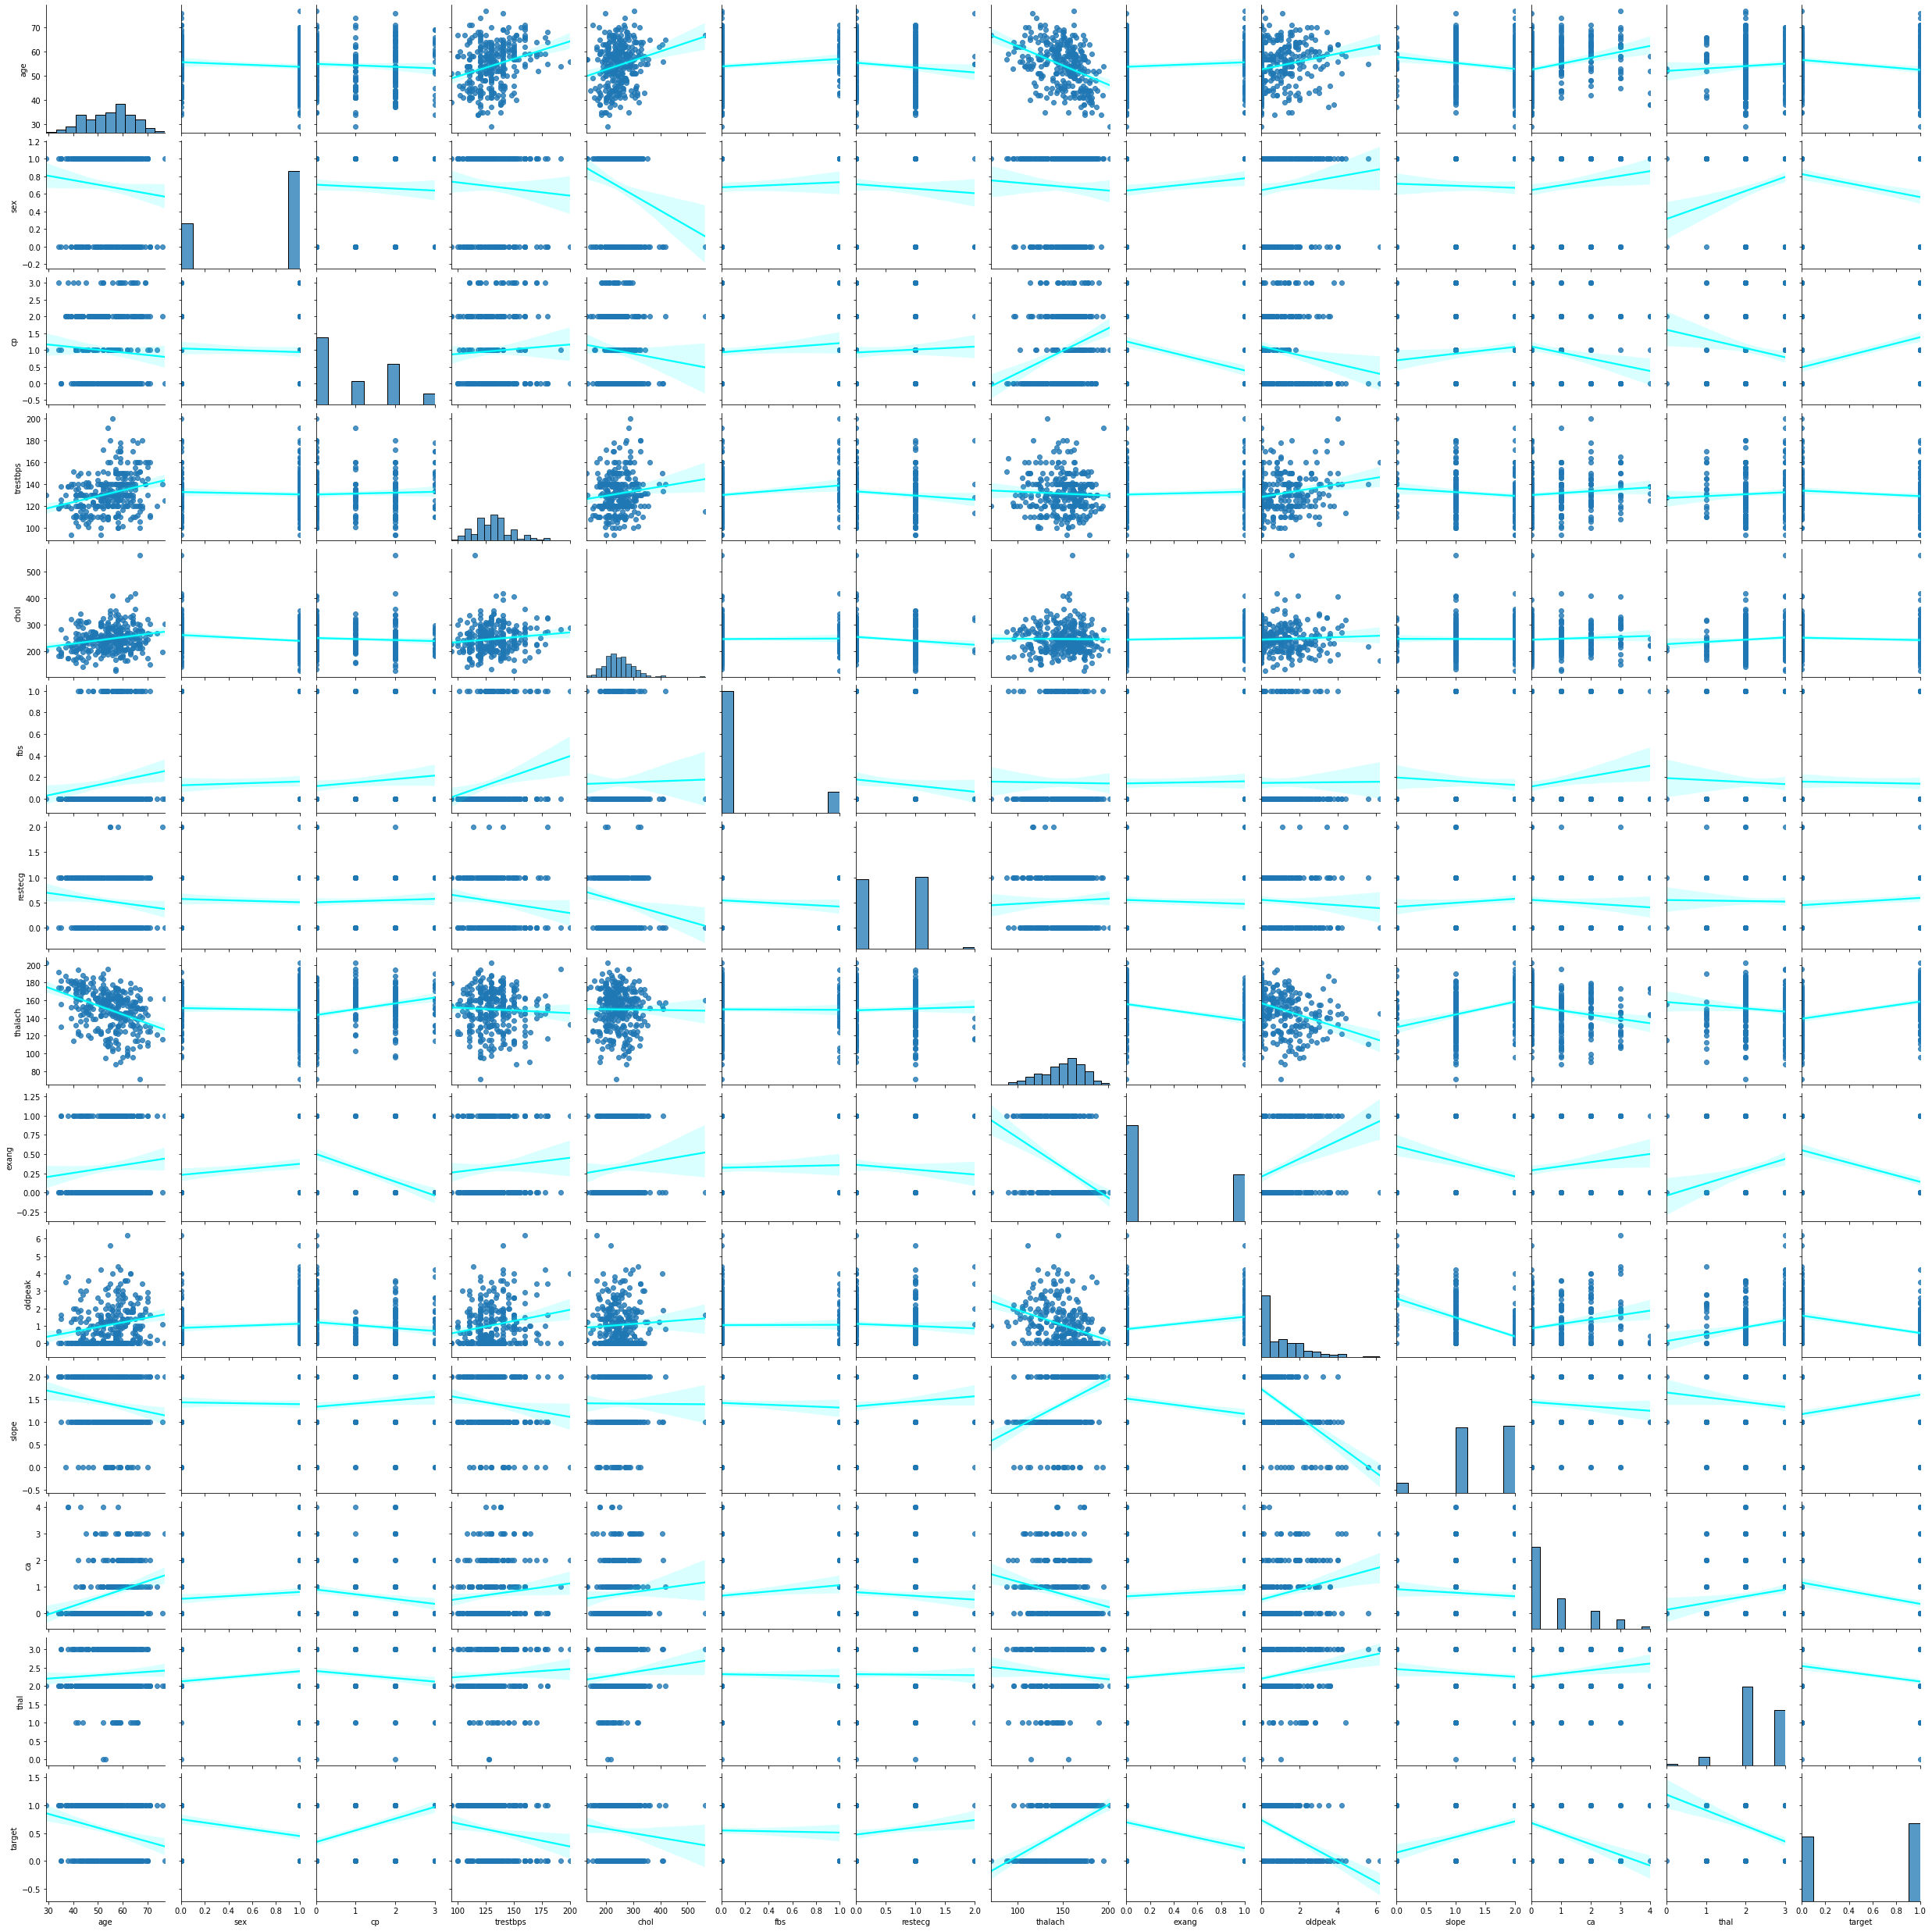

In [25]:
sns.pairplot(df, kind='reg', plot_kws={'line_kws':{'color': 'cyan'}})
plt.show()

In [26]:
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [27]:
for i in corr.columns:
    for j in range(0, len(corr)):
        if(corr[i][j] >= 0.9 and corr[i][j] != 1):
            print("High co-relation is found between ",i," ",corr.columns[j])

<center><h6>High co-relation is not found between any of the two parameters so we can move on

### Univariate Selection

In [28]:
X = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal']]
y = df[['target']]

In [29]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

       Specs       Score
7    thalach  188.320472
9    oldpeak   72.644253
11        ca   66.440765
2         cp   62.598098
8      exang   38.914377
4       chol   23.936394
0        age   23.286624
3   trestbps   14.823925
10     slope    9.804095
1        sex    7.576835


In [30]:
print(dfcolumns,dfscores)

           0
0        age
1        sex
2         cp
3   trestbps
4       chol
5        fbs
6    restecg
7    thalach
8      exang
9    oldpeak
10     slope
11        ca
12      thal              0
0    23.286624
1     7.576835
2    62.598098
3    14.823925
4    23.936394
5     0.202934
6     2.978271
7   188.320472
8    38.914377
9    72.644253
10    9.804095
11   66.440765
12    5.791853


In [31]:
X1 = df[['thalach', 'oldpeak', 'ca', 'cp', 'exang', 'chol', 'age', 'trestbps', 'slope', 'sex']]
y1 = df[['target']]

In [32]:
#Without feature selection
x_train1, x_test1, y_train1, y_test1 =  train_test_split(X, y, test_size=0.33, random_state=42)
#Only Univarent solution
x_train2, x_test2, y_train2, y_test2 =  train_test_split(X1, y1, test_size=0.33, random_state=42)

### Feature Importance

<ipython-input-33-a0c98b22793f>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X,y)


[0.07109771 0.05342458 0.12875501 0.06183973 0.06045539 0.01994279
 0.03676316 0.08516905 0.10638822 0.08290547 0.06632993 0.12398607
 0.10294289]


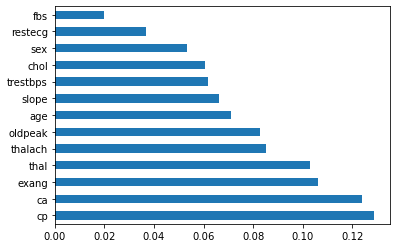

In [33]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()

In [34]:
#only from Feature Importance
X3 = df[['age', 'cp', 'trestbps', 'chol', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal']]
y3 = df[['target']]

In [35]:
#both feature Importance(2features) and Univarent Solution(2 features)
X4 = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach','exang', 'oldpeak', 'slope', 'ca']]
y4 = df[['target']]

In [36]:
x_train3, x_test3, y_train3, y_test3 =  train_test_split(X3, y3, test_size=0.33, random_state=42)
x_train4, x_test4, y_train4, y_test4 =  train_test_split(X4, y4, test_size=0.33, random_state=42)

<center><h2>LogisticRegression

In [37]:
def modelRegression(x_train, y_train, x_test, y_test):
    model = LogisticRegression(max_iter=2200)
    model.fit(x_train, y_train)
    print("Accuracy ", model.score(x_test, y_test))

In [38]:
def ravelFun(y_train1, y_test1):
    y_train1 = np.ravel(y_train1)
    y_test1 = np.ravel(y_test1)
    return (y_train1, y_test1)

In [39]:
y_train1, y_test1 = ravelFun(y_train1, y_test1)
y_train2, y_test2 = ravelFun(y_train2, y_test2)
y_train3, y_test3 = ravelFun(y_train3, y_test3)
y_train4, y_test4 = ravelFun(y_train4, y_test4)

In [40]:
modelRegression(x_train1, y_train1, x_test1, y_test1)

Accuracy  0.8


In [41]:
modelRegression(x_train2, y_train2, x_test2, y_test2)

Accuracy  0.84


In [42]:
modelRegression(x_train3, y_train3, x_test3, y_test3)

Accuracy  0.81


In [43]:
modelRegression(x_train4, y_train4, x_test4, y_test4)

Accuracy  0.84


In [44]:
len(x_train4.columns)

10

<center> <h2> DeepLearning

In [56]:
#Neural Network
model_1 = Sequential() 
model_1.add(Dense(units=100, input_dim=13, activation='sigmoid', name='Layer_1'))
model_1.add(Dense(units=1000, activation='sigmoid', name='Layer_2'))
model_1.add(Dense(units=500, activation='sigmoid', name='Layer_3'))
model_1.add(Dense(units=2, activation='softmax', name='Output_Layer'))

#compilting our model
model_1.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [57]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Layer_1 (Dense)              (None, 100)               1400      
_________________________________________________________________
Layer_2 (Dense)              (None, 1000)              101000    
_________________________________________________________________
Layer_3 (Dense)              (None, 500)               500500    
_________________________________________________________________
Output_Layer (Dense)         (None, 2)                 1002      
Total params: 603,902
Trainable params: 603,902
Non-trainable params: 0
_________________________________________________________________


In [62]:
%%time

hist = model_1.fit(x_train1, y_train1, batch_size=samples_per_batch, callbacks=[tensorboard_callback], epochs=nr_epochs, validation_data=(x_test1, y_test1))

Epoch 1/150
2/2 [==============================] - 1s 364ms/step - loss: 0.8575 - accuracy: 0.5271 - val_loss: 0.6322 - val_accuracy: 0.5800
Epoch 2/150
2/2 [==============================] - 0s 88ms/step - loss: 0.7492 - accuracy: 0.5320 - val_loss: 0.5481 - val_accuracy: 0.7200
Epoch 3/150
2/2 [==============================] - 0s 109ms/step - loss: 0.6257 - accuracy: 0.6256 - val_loss: 0.5801 - val_accuracy: 0.6900
Epoch 4/150
2/2 [==============================] - 0s 92ms/step - loss: 0.6219 - accuracy: 0.6502 - val_loss: 0.6785 - val_accuracy: 0.5600
Epoch 5/150
2/2 [==============================] - 0s 91ms/step - loss: 0.6925 - accuracy: 0.5369 - val_loss: 0.7015 - val_accuracy: 0.5400
Epoch 6/150
2/2 [==============================] - 0s 78ms/step - loss: 0.7094 - accuracy: 0.5271 - val_loss: 0.6568 - val_accuracy: 0.5900
Epoch 7/150
2/2 [==============================] - 0s 75ms/step - loss: 0.6727 - accuracy: 0.5517 - val_loss: 0.6042 - val_accuracy: 0.6500
Epoch 8/150
2/2 [=

2/2 [==============================] - 0s 83ms/step - loss: 0.6047 - accuracy: 0.6749 - val_loss: 0.5019 - val_accuracy: 0.7600
Epoch 58/150
2/2 [==============================] - 0s 130ms/step - loss: 0.5761 - accuracy: 0.6995 - val_loss: 0.5490 - val_accuracy: 0.6800
Epoch 59/150
2/2 [==============================] - 0s 93ms/step - loss: 0.5975 - accuracy: 0.6601 - val_loss: 0.5706 - val_accuracy: 0.6700
Epoch 60/150
2/2 [==============================] - 0s 96ms/step - loss: 0.6113 - accuracy: 0.6601 - val_loss: 0.5399 - val_accuracy: 0.7100
Epoch 61/150
2/2 [==============================] - 0s 99ms/step - loss: 0.5896 - accuracy: 0.6749 - val_loss: 0.5014 - val_accuracy: 0.7300
Epoch 62/150
2/2 [==============================] - 0s 108ms/step - loss: 0.5670 - accuracy: 0.6995 - val_loss: 0.4818 - val_accuracy: 0.7900
Epoch 63/150
2/2 [==============================] - 0s 97ms/step - loss: 0.5641 - accuracy: 0.7044 - val_loss: 0.4746 - val_accuracy: 0.7800
Epoch 64/150
2/2 [======

Epoch 115/150
2/2 [==============================] - 0s 101ms/step - loss: 0.5400 - accuracy: 0.7241 - val_loss: 0.4666 - val_accuracy: 0.7800
Epoch 116/150
2/2 [==============================] - 0s 106ms/step - loss: 0.5701 - accuracy: 0.7192 - val_loss: 0.4686 - val_accuracy: 0.7800
Epoch 117/150
2/2 [==============================] - 0s 165ms/step - loss: 0.5784 - accuracy: 0.7192 - val_loss: 0.4729 - val_accuracy: 0.7800
Epoch 118/150
2/2 [==============================] - 0s 99ms/step - loss: 0.5922 - accuracy: 0.6946 - val_loss: 0.4716 - val_accuracy: 0.7700
Epoch 119/150
2/2 [==============================] - 0s 189ms/step - loss: 0.5945 - accuracy: 0.6995 - val_loss: 0.4553 - val_accuracy: 0.7900
Epoch 120/150
2/2 [==============================] - 0s 92ms/step - loss: 0.5531 - accuracy: 0.7094 - val_loss: 0.4649 - val_accuracy: 0.8200
Epoch 121/150
2/2 [==============================] - 0s 155ms/step - loss: 0.5338 - accuracy: 0.7537 - val_loss: 0.4870 - val_accuracy: 0.7900
E

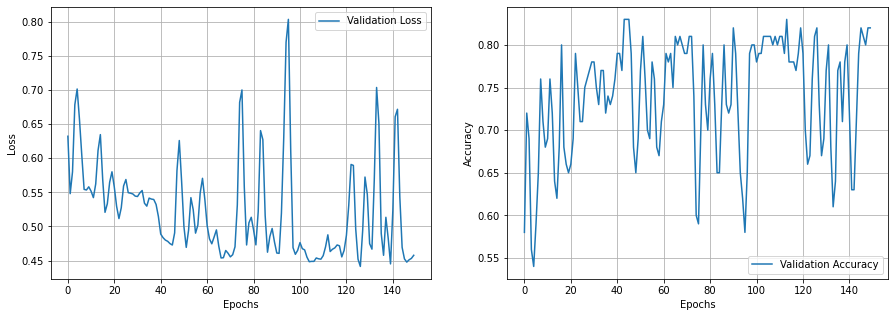

In [65]:
plt.figure(1, figsize = (15, 5))
plt.subplot(1,2,1)
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.plot( hist.history["loss"], label = "Training Loss")
plt.plot( hist.history["val_loss"], label = "Validation Loss")
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.plot(hist.history["accuracy"], label = "Training Accuracy")
plt.plot(hist.history["val_accuracy"], label = "Validation Accuracy")
plt.grid(True)
plt.legend()
plt.show()